In [1]:
# 2018-07-10
# A. Pendleton
# Calculating gene model statistics at various stages
# Stats include intron/exon lengths, GC content, etc.

In [29]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import gzip
import fileinput
import glob
from scipy import stats
import re
from matplotlib_venn import venn3, venn3_circles
from collections import OrderedDict
import seaborn as sns

def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)
# TO REMOVE TOP AND RIGHT AXIS OF PLOTS
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# PASA OUTPUTS
## Calculating Stats using 2 thresholds of maximum intron lengths during PASA processing: 
## Length 1 = 10,000 bp, Length 2 = 100,000 bp (default for PASA)

In [51]:
length1File = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/PASA_Processing/pasa-lite_assemblyAssembler_results/pasa-lite_ZoeyTrinity.pasa_assembled_alignments.gtf'

#Keeping track of exon counts/lengths
length1ExonLengths = []
length1ExonCounts = []
exon1Dict = {}
#Keeping track of intron stats
length1IntronLengths = []
intron1Dict = {}

#Keeping track of full leng
length1TranscriptLengths = []

lineCount,transcriptCount = 0,0 
exonCount = 0 # for first call, set to zero

for line in open(length1File,'r'):
    lineCount += 1        
    line=line.rstrip().split('\t')
    if '#' in line[0] or len(line) == 1: #skip header
        continue
    
    #calculate start/end coordinates
    start,end = int(line[3]) - 1, int(line[4])
    length = end - start
    
    if 'transcript' in line[2]:
        transcriptCount += 1
        length1TranscriptLengths.append(length)
        if lineCount != 2:
            length1ExonCounts.append(exonCount) #add the count from the previous gene
        exonCount = 0
        exonCoords, e = [], -1 # to keep track of the start, end coordinates of each exon
        i = 0 #intron index
        
    if 'exon' in line[2]:
        #Add exon length to array:
        length1ExonLengths.append(length)
        exonCount += 1 #Keep track of exon count
        e += 1 #for dict/array index
        exonCoords.append([start,end]) #start/end coordinates per exon
        
        #Storing exon length by exon number:
        if e+1 not in exon1Dict.keys():
            exon1Dict[e+1] = []
        exon1Dict[e+1].append(length)    
        
    # Get intron lengths, means that the gene must have more than one exon
    if exonCount > 1:
        i += 1 #intron index = intron number
        
        #Intron size depends on coordinates of the exons A and B surrounding it:
        startB, endA = exonCoords[e-1][1],exonCoords[e][0]
        intronLength = int(endA) - int(startB)
        length1IntronLengths.append(intronLength)
        
        #Storing intron length by intron number:
        if i not in intron1Dict.keys():
            intron1Dict[i] = []
        intron1Dict[i].append(intronLength)

        
print('Stored transcript, exon, and intron stats for %i transcripts' % transcriptCount)


Stored transcript, exon, and intron stats for 1217471 transcripts


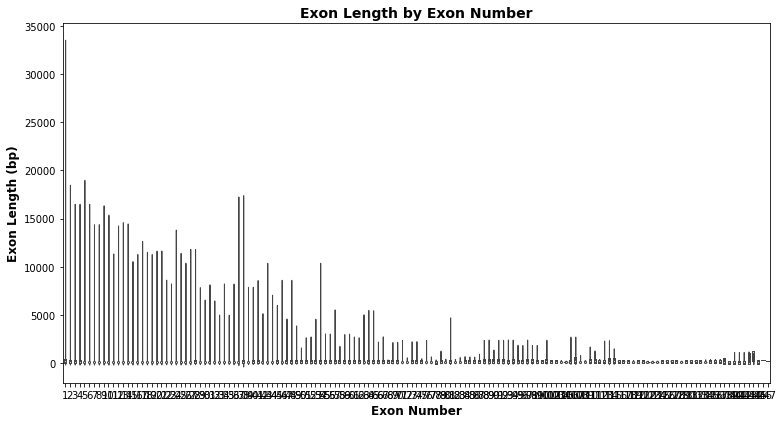

In [54]:
#plotting exon size distributions by exon number
df_exon_length1_1 = pd.DataFrame.from_dict(exonDict, orient='index')
df_exon_length1_2 = df_exon_length1_1.transpose()
df_exon_length1_2.head()

#PLOTTING
f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=df_exon_length1_2, bw=.2, cut=1, linewidth=1)
plt.xlabel('Exon Number', fontweight='bold',fontsize=12)
plt.ylabel('Exon Length (bp)', fontweight='bold',fontsize=12)
plt.title('Exon Length by Exon Number', fontweight='bold',fontsize=14)
plt.tight_layout()



In [ ]:
#plotting exon size distributions by intron number
df_intron_length1_1 = pd.DataFrame.from_dict(intronDict, orient='index')
df_intron_length1_2 = df_intron_length1_1.transpose()
df_intron_length1_2.head()

#PLOTTING
f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=df_intron_length1_2, bw=.2, cut=1, linewidth=1)
plt.xlabel('Intron Number', fontweight='bold',fontsize=12)
plt.ylabel('Intron Length (bp)', fontweight='bold',fontsize=12)
plt.title('Intron Length by Intron Number', fontweight='bold',fontsize=14)
plt.tight_layout()

# PASA OUTPUTS
## Calculating Stats using 2 thresholds of maximum intron lengths during PASA processing: 
## Length 1 = 10,000 bp, Length 2 = 100,000 bp (default for PASA)

In [59]:
length2File = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/PASA_Processing/version_2/pasa-lite_assemblyAssembler_results/pasa-lite_ZoeyTrinity.pasa_assembled_alignments.gtf'

#Keeping track of exon counts/lengths
length2ExonLengths = []
length2ExonCounts = []
exon2Dict = {}
#Keeping track of intron stats
length2IntronLengths = []
intron2Dict = {}

#Keeping track of full leng
length2TranscriptLengths = []

lineCount,transcriptCount = 0,0 
exonCount = 0 # for first call, set to zero

for line in open(length2File,'r'):
    lineCount += 1        
    line=line.rstrip().split('\t')
    if '#' in line[0] or len(line) == 1: #skip header
        continue
    
    #calculate start/end coordinates
    start,end = int(line[3]) - 1, int(line[4])
    length = end - start
    
    if 'transcript' in line[2]:
        transcriptCount += 1
        length2TranscriptLengths.append(length)
        if lineCount != 2:
            length2ExonCounts.append(exonCount) #add the count from the previous gene
        exonCount = 0
        exonCoords, e = [], -1 # to keep track of the start, end coordinates of each exon
        i = 0 #intron index
        
    if 'exon' in line[2]:
        #Add exon length to array:
        length2ExonLengths.append(length)
        exonCount += 1 #Keep track of exon count
        e += 1 #for dict/array index
        exonCoords.append([start,end]) #start/end coordinates per exon
        
        #Storing exon length by exon number:
        if e+1 not in exon2Dict.keys():
            exon2Dict[e+1] = []
        exon2Dict[e+1].append(length)    
        
    # Get intron lengths, means that the gene must have more than one exon
    if exonCount > 1:
        i += 1 #intron index = intron number
        
        #Intron size depends on coordinates of the exons A and B surrounding it:
        startB, endA = exonCoords[e-1][1],exonCoords[e][0]
        intronLength = int(endA) - int(startB)
        length2IntronLengths.append(intronLength)
        
        #Storing intron length by intron number:
        if i not in intron2Dict.keys():
            intron2Dict[i] = []
        intron2Dict[i].append(intronLength)

        
print('Stored transcript, exon, and intron stats for %i transcripts' % transcriptCount)


Stored transcript, exon, and intron stats for 484499 transcripts


/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 300000)

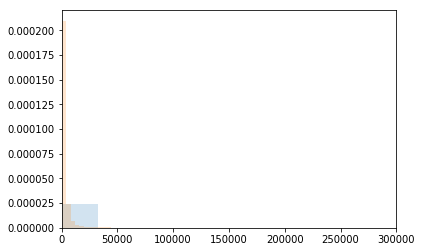

In [58]:
#Plotting intron size distribution of LENGTH 1 (10,000) vs LENGTH 2 (100,000)
_ = plt.hist(length1IntronLengths,bins=50,normed=True,alpha=0.2)
_ = plt.hist(length2IntronLengths,bins=50,normed=True,alpha=0.2)
plt.xlim(0,300000)
